In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import statistics
from scipy import signal
from scipy.optimize import curve_fit
import scipy.fftpack
from scipy import interpolate
from cycler import cycler
from inspect import signature

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
#%matplotlib notebook

In [3]:
#reading routine
def read_table(folder, file) :
    file = folder + file
    file_list = []
    print(file)
    for line in open(file) :
        temp_array_line = []
        try :
            if line[0] == '#' :          #skip commented lines
                continue
            else :
                temp_array_line=list(map(float, line.split( )))
                file_list.append(temp_array_line)
        except :
            print('error')
    k = np.array(file_list[0])
    nb_of_modes = np.array(file_list[1])
    table = np.array(file_list[2:])
    t = table[:,0]
    corr = table[:,1:]
    return [k, nb_of_modes,t,corr]

In [4]:
# Rl = 90; N = 256
# # [k, nb_of_modes, t, corr] = read_table("/home/gorbunov8a/data/correlations/rl90_N256/norm_corr/run1/", "two_point_corr_lin_Cnn_wi=122.table")
# # [k, nb_of_modes, t, avg] = read_table("/home/gorbunov8a/data/correlations/rl90_N256/norm_corr/run1/", "two_point_corr_normuk_lin_Cavg_wi=122.table")
# [k, nb_of_modes, t, corr] = read_table("/home/gorbunov8a/data/correlations/rl60_N128/norm_corr/run1/", "two_point_corr_lin_Cnn_wi=001399.table")
# [k, nb_of_modes, t, avg] = read_table("/home/gorbunov8a/data/correlations/rl60_N128/norm_corr/run1/", "two_point_corr_normuk_lin_Cavg_wi=001399.table")

In [39]:
[k, nb_of_modes, t, corr] = read_table("/home/gorbunov8a/CODE/random_advection_test/e10/exponent/", "scalar1_two_point_corr_norms_lin_Cavg_wi=114.table")
[k, nb_of_modes, t, avg] = read_table("/home/gorbunov8a/CODE/random_advection_test/e10/exponent/", "scalar1_avg_norms_lin_Cavg_wi=114.table")

/home/gorbunov8a/CODE/random_advection_test/e10/exponent/scalar1_two_point_corr_norms_lin_Cavg_wi=114.table
/home/gorbunov8a/CODE/random_advection_test/e10/exponent/scalar1_avg_norms_lin_Cavg_wi=114.table


In [40]:
t.shape

(1001,)

In [41]:
k.shape

(32,)

In [42]:
corr.shape

(1001, 32)

In [43]:
avg.shape

(1001, 32)

In [44]:
u0_avg = avg[0,]
correlations = corr - u0_avg*avg

In [45]:
kmin = 5
kmax = 30
nb_of_curves = 12
step = round((kmax - kmin)/nb_of_curves)
indices_of_k_to_plot=list(range(kmin,kmax,step))
#indices_of_k_to_plot.append(50)
print(indices_of_k_to_plot)

[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


In [46]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
default_cycler = cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors))
plt.rc('axes', prop_cycle=default_cycler)

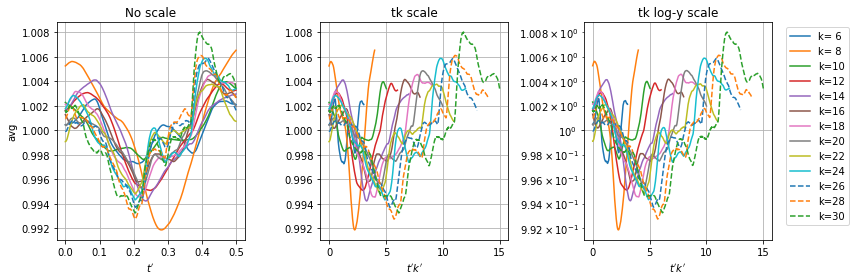

In [47]:
fig, (norm_scale, tk_scale, log_scale) = plt.subplots(nrows=1, ncols=3,figsize=(12,4), tight_layout=True)
for ik in indices_of_k_to_plot :
    time_slice = np.s_[0:-1]
    norm_scale.plot(t[time_slice], (u0_avg*avg)[time_slice,ik]/np.mean((u0_avg*avg)[time_slice,ik]))
    tk_scale.plot(t[time_slice]*k[ik], (u0_avg*avg)[time_slice,ik]/np.mean((u0_avg*avg)[time_slice,ik]))
    log_scale.plot(t[time_slice]*k[ik], (u0_avg*avg)[time_slice,ik]/np.mean((u0_avg*avg)[time_slice,ik]), label='k=%2.f' % (k[ik]))
norm_scale.set(yscale='linear', xscale='linear', title='No scale', ylabel=r'avg', xlabel=r'$t^\prime$'); norm_scale.grid()
tk_scale.set(yscale='linear', xscale='linear', title='tk scale', xlabel=r'$t^\prime k^\prime$'); tk_scale.grid()
log_scale.set(yscale='log', xscale='linear', title='tk log-y scale', xlabel=r'$t^\prime k^\prime$'); log_scale.grid()
log_scale.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

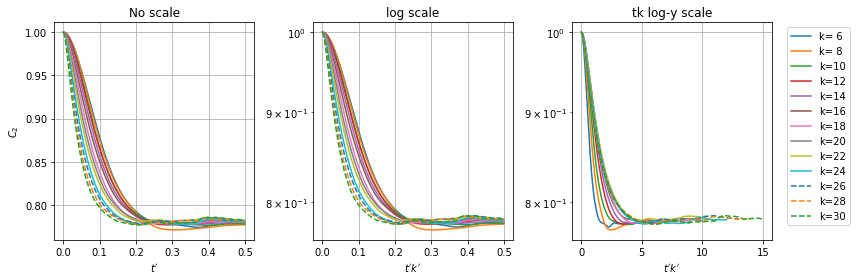

In [48]:
fig, (norm_scale, tk_scale, log_scale) = plt.subplots(nrows=1, ncols=3,figsize=(12,4), tight_layout=True)
for ik in indices_of_k_to_plot :
    time_slice = np.s_[0:-1]
    norm_scale.plot(t[time_slice], corr[time_slice,ik]/corr[0,ik])
    tk_scale.plot(t[time_slice], corr[time_slice,ik]/corr[0,ik])
    log_scale.plot(t[time_slice]*k[ik], corr[time_slice,ik]/corr[0,ik], label='k=%2.f' % (k[ik]))
norm_scale.set(yscale='linear', xscale='linear', title='No scale', ylabel=r'$C_2$', xlabel=r'$t^\prime$'); norm_scale.grid()
tk_scale.set(yscale='log', xscale='linear', title='log scale', xlabel=r'$t^\prime k^\prime$'); tk_scale.grid()
log_scale.set(yscale='log', xscale='linear', title='tk log-y scale', xlabel=r'$t^\prime k^\prime$'); log_scale.grid()
log_scale.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

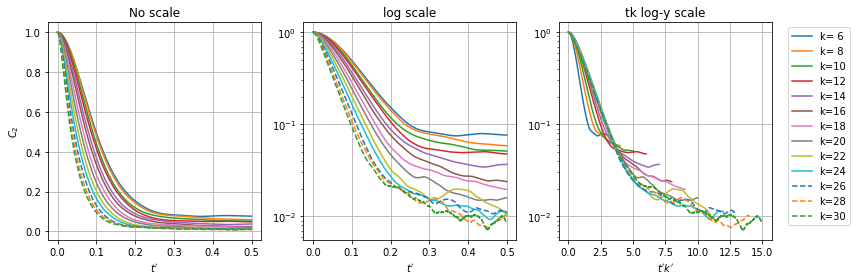

In [49]:
fig, (norm_scale, tk_scale, log_scale) = plt.subplots(nrows=1, ncols=3,figsize=(12,4), tight_layout=True)
for ik in indices_of_k_to_plot :
    time_slice = np.s_[0:-1]
    norm_scale.plot(t[time_slice], correlations[time_slice,ik]/correlations[0,ik])
    tk_scale.plot(t[time_slice], correlations[time_slice,ik]/correlations[0,ik])
    log_scale.plot(t[time_slice]*k[ik], correlations[time_slice,ik]/correlations[0,ik], label='k=%2.f' % (k[ik]))
norm_scale.set(yscale='linear', xscale='linear', title='No scale', ylabel=r'$C_2$', xlabel=r'$t^\prime$'); norm_scale.grid()
tk_scale.set(yscale='log', xscale='linear', title='log scale', xlabel=r'$t^\prime$'); tk_scale.grid()
log_scale.set(yscale='log', xscale='linear', title='tk log-y scale', xlabel=r'$t^\prime k^\prime$'); log_scale.grid()
log_scale.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
# fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,5), tight_layout=True)
# fig.suptitle('2nd log derivative')
# #for ik in range(7, 25) :
# for ik in indices_of_k_to_plot :
#     deriv1 = np.gradient(corr[:,ik]/corr[0,ik],t, edge_order=1)
#     deriv2 = np.gradient(np.log(-deriv1),t[:], edge_order=1)
#     first_nan_index = np.argwhere(np.isnan(deriv2))[0,0]
#     time_slice = np.s_[0:first_nan_index]
#     ax[0].plot(t[time_slice]*k[ik], deriv2[time_slice]/k[ik]**2, label='k=%2.f' % (k[ik]))

#     deriv1 = np.gradient(correlations[:,ik]/correlations[0,ik],t, edge_order=1)
#     deriv2 = np.gradient(np.log(-deriv1),t[:], edge_order=1)
#     first_nan_index = np.argwhere(np.isnan(deriv2))[0,0]
#     time_slice = np.s_[0:first_nan_index]
#     ax[1].plot(t[time_slice]*k[ik], deriv2[time_slice]/k[ik]**2, label='k=%2.f' % (k[ik]))
# ax[0].set(yscale='linear', xscale='linear', title='with noise', xlabel=r'$t$'); ax[0].grid()
# ax[1].set(yscale='linear', xscale='linear', title='background reduction', xlabel=r'$t$'); ax[1].grid()
# ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()